# Exploratory Data Analysis for Machine Learning

Sections required in your report:

* Brief description of the data set and a summary of its attributes
* Initial plan for data exploration
* Actions taken for data cleaning and feature engineering
* Key Findings and Insights, which synthesizes the results of Exploratory Data Analysis in an insightful and actionable manner
* Formulating at least 3 hypothesis about this data
* Conducting a formal significance test for one of the hypotheses and discuss the results 
* Suggestions for next steps in analyzing this data
* A paragraph that summarizes the quality of this data set and a request for additional data if needed

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 
sns.set()

#### Load data, Examine and Explore

In [2]:
data = pd.read_csv('data/Ames_Housing_Data.tsv', sep = '\t')

In [3]:
#Examine columns for missing values

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
Order              2930 non-null int64
PID                2930 non-null int64
MS SubClass        2930 non-null int64
MS Zoning          2930 non-null object
Lot Frontage       2440 non-null float64
Lot Area           2930 non-null int64
Street             2930 non-null object
Alley              198 non-null object
Lot Shape          2930 non-null object
Land Contour       2930 non-null object
Utilities          2930 non-null object
Lot Config         2930 non-null object
Land Slope         2930 non-null object
Neighborhood       2930 non-null object
Condition 1        2930 non-null object
Condition 2        2930 non-null object
Bldg Type          2930 non-null object
House Style        2930 non-null object
Overall Qual       2930 non-null int64
Overall Cond       2930 non-null int64
Year Built         2930 non-null int64
Year Remod/Add     2930 non-null int64
Roof Style         29

Lot of colums have lot of missing values.

In [4]:
data.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [5]:
print("Number of rows in the data:", data.shape[0])
print("Number of columns in the data:", data.shape[1])

Number of rows in the data: 2930
Number of columns in the data: 82


In [6]:
data.describe().T.sort_values(by = 'count')

,count,mean,std,min,25%,50%,75%,max
Lot Frontage,2440.0,6.922459e+01,2.336533e+01,21.0,5.800000e+01,68.0,8.000000e+01,3.130000e+02
Garage Yr Blt,2771.0,1.978132e+03,2.552841e+01,1895.0,1.960000e+03,1979.0,2.002000e+03,2.207000e+03
Mas Vnr Area,2907.0,1.018968e+02,1.791126e+02,0.0,0.000000e+00,0.0,1.640000e+02,1.600000e+03
Bsmt Half Bath,2928.0,6.113388e-02,2.452536e-01,0.0,0.000000e+00,0.0,0.000000e+00,2.000000e+00
Bsmt Full Bath,2928.0,4.313525e-01,5.248202e-01,0.0,0.000000e+00,0.0,1.000000e+00,3.000000e+00
Garage Cars,2929.0,1.766815e+00,7.605664e-01,0.0,1.000000e+00,2.0,2.000000e+00,5.000000e+00
Garage Area,2929.0,4.728197e+02,2.150465e+02,0.0,3.200000e+02,480.0,5.760000e+02,1.488000e+03
Total Bsmt SF,2929.0,1.051615e+03,4.406151e+02,0.0,7.930000e+02,990.0,1.302000e+03,6.110000e+03
Bsmt Unf SF,2929.0,5.592625e+02,4.394942e+02,0.0,2.190000e+02,466.0,8.020000e+02,2.336000e+03
BsmtFin SF 2,2929.0,4.972243e+01,1.691685e+02,0.0,0.000000e+00,0.0,0.000000e+00,1.526000e+03


In [7]:
data.describe(include = 'object').T

,count,unique,top,freq
MS Zoning,2930,7,RL,2273
Street,2930,2,Pave,2918
Alley,198,2,Grvl,120
Lot Shape,2930,4,Reg,1859
Land Contour,2930,4,Lvl,2633
Utilities,2930,3,AllPub,2927
Lot Config,2930,5,Inside,2140
Land Slope,2930,3,Gtl,2789
Neighborhood,2930,28,NAmes,443
Condition 1,2930,9,Norm,2522


#### Checking for missing values and dealing with them

In [8]:
missingdata = data.isnull().sum().sort_values()
missingdata.tail(10)

Garage Finish     159
Garage Cond       159
Garage Yr Blt     159
Garage Qual       159
Lot Frontage      490
Fireplace Qu     1422
Fence            2358
Alley            2732
Misc Feature     2824
Pool QC          2917
dtype: int64

[Text(66.5, 0.5, 'Data Points'),
 Text(0.5, 48.453125, 'Columns'),
 Text(0.5, 1, 'Missing data')]

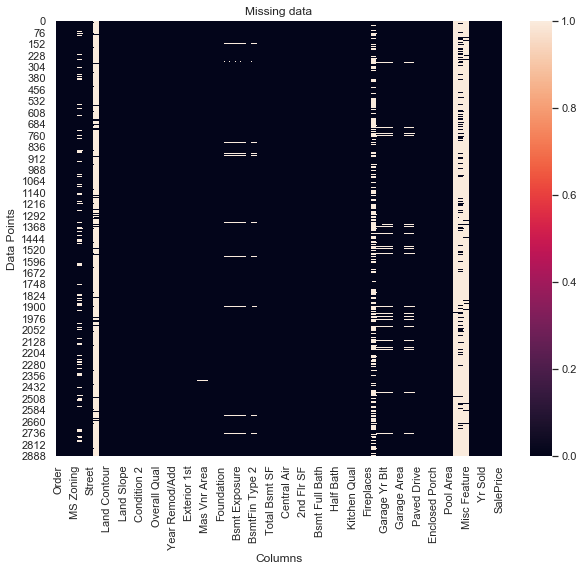

In [9]:
sns.set(rc={'figure.figsize':(10,8)})
sns.heatmap(data.isnull()).set(title = 'Missing data', xlabel = 'Columns', ylabel = 'Data Points')

1.  Fireplace Qu      
2.  Fence   
3.  Alley 
4.  Misc Feature  
5.  Pool QC 

These have too much missing data so we can remove them

In [10]:
data = data.drop(['Fireplace Qu','Fence','Alley','Misc Feature','Pool QC'], axis = 1) 

In [11]:
data.isnull().sum().sort_values()

Order              0
Heating            0
Heating QC         0
Central Air        0
1st Flr SF         0
                ... 
Garage Cond      159
Garage Qual      159
Garage Finish    159
Garage Yr Blt    159
Lot Frontage     490
Length: 77, dtype: int64

[Text(66.5, 0.5, 'Data Points'),
 Text(0.5, 48.453125, 'Columns'),
 Text(0.5, 1, 'Missing data')]

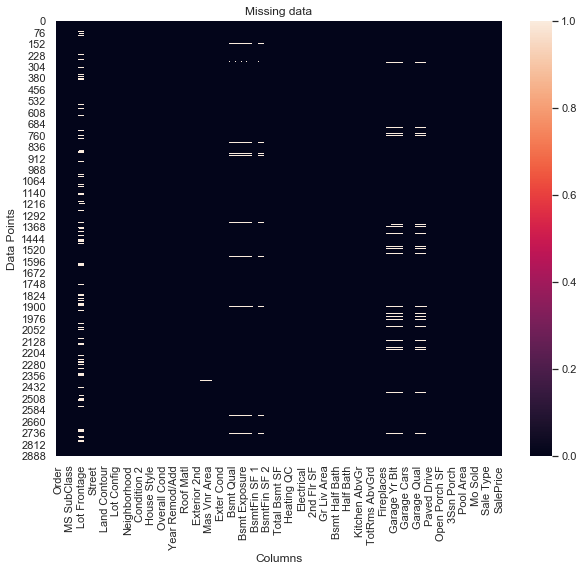

In [12]:
sns.heatmap(data.isnull()).set(title = 'Missing data', xlabel = 'Columns', ylabel = 'Data Points')

In [13]:
print('Unique values in Mas Vnr Type',data['Mas Vnr Type'].unique())
data['Mas Vnr Type'].value_counts()

Unique values in Mas Vnr Type ['Stone' 'None' 'BrkFace' nan 'BrkCmn' 'CBlock']


None       1752
BrkFace     880
Stone       249
BrkCmn       25
CBlock        1
Name: Mas Vnr Type, dtype: int64

This column have most of 'None' type so we replace missing values to None 

In [14]:
data['Mas Vnr Type'].fillna('None', inplace = True)

In [15]:
print('Unique values in Bsmt Qual',data['Bsmt Qual'].unique())
data['Bsmt Qual'].value_counts()

Unique values in Bsmt Qual ['TA' 'Gd' 'Ex' nan 'Fa' 'Po']


TA    1283
Gd    1219
Ex     258
Fa      88
Po       2
Name: Bsmt Qual, dtype: int64

In [16]:
data['Bsmt Qual'].fillna('TA', inplace = True)

This column have most of 'TA' type so we replace missing values to TA 

In [17]:
print('Unique values in Garage Cond',data['Garage Cond'].unique())
data['Garage Cond'].value_counts()

Unique values in Garage Cond ['TA' nan 'Fa' 'Gd' 'Ex' 'Po']


TA    2665
Fa      74
Gd      15
Po      14
Ex       3
Name: Garage Cond, dtype: int64

In [18]:
data['Garage Cond'].fillna('TA', inplace = True)

In [19]:
print('Unique values in Garage Qual',data['Garage Qual'].unique())
data['Garage Qual'].value_counts()

Unique values in Garage Qual ['TA' nan 'Fa' 'Gd' 'Ex' 'Po']


TA    2615
Fa     124
Gd      24
Po       5
Ex       3
Name: Garage Qual, dtype: int64

In [20]:
data['Garage Qual'].fillna('TA', inplace = True)

In [21]:
print('Unique values in Garage Finish',data['Garage Finish'].unique())
data['Garage Finish'].value_counts()

Unique values in Garage Finish ['Fin' 'Unf' 'RFn' nan]


Unf    1231
RFn     812
Fin     728
Name: Garage Finish, dtype: int64

In [22]:
data['Garage Finish'].fillna('Unf', inplace = True)

In [23]:
print('Unique values in Garage Type',data['Garage Type'].unique())
data['Garage Type'].value_counts()

Unique values in Garage Type ['Attchd' 'BuiltIn' 'Basment' 'Detchd' nan 'CarPort' '2Types']


Attchd     1731
Detchd      782
BuiltIn     186
Basment      36
2Types       23
CarPort      15
Name: Garage Type, dtype: int64

In [24]:
data['Garage Type'].fillna('Attchd', inplace = True)

In [25]:
print('Unique values in Bsmt Exposure',data['Bsmt Exposure'].unique())
data['Bsmt Exposure'].value_counts()

Unique values in Bsmt Exposure ['Gd' 'No' 'Mn' 'Av' nan]


No    1906
Av     418
Gd     284
Mn     239
Name: Bsmt Exposure, dtype: int64

In [26]:
data['Bsmt Exposure'].fillna('No', inplace = True)

In [27]:
print('Unique values in BsmtFin Type 2',data['BsmtFin Type 2'].unique())
data['BsmtFin Type 2'].value_counts()

Unique values in BsmtFin Type 2 ['Unf' 'LwQ' 'BLQ' 'Rec' nan 'GLQ' 'ALQ']


Unf    2499
Rec     106
LwQ      89
BLQ      68
ALQ      53
GLQ      34
Name: BsmtFin Type 2, dtype: int64

In [28]:
data['BsmtFin Type 2'].fillna('Unf', inplace = True)

In [29]:
print('Unique values in Bsmt Cond',data['Bsmt Cond'].unique())
data['Bsmt Cond'].value_counts()

Unique values in Bsmt Cond ['Gd' 'TA' nan 'Po' 'Fa' 'Ex']


TA    2616
Gd     122
Fa     104
Po       5
Ex       3
Name: Bsmt Cond, dtype: int64

In [30]:
data['Bsmt Cond'].fillna('TA', inplace = True)

In [31]:
print('Unique values in BsmtFin Type 1',data['BsmtFin Type 1'].unique())
data['BsmtFin Type 1'].value_counts()

Unique values in BsmtFin Type 1 ['BLQ' 'Rec' 'ALQ' 'GLQ' 'Unf' 'LwQ' nan]


GLQ    859
Unf    851
ALQ    429
Rec    288
BLQ    269
LwQ    154
Name: BsmtFin Type 1, dtype: int64

In [32]:
data['BsmtFin Type 1'].fillna('GLQ', inplace = True)

In [33]:
print('Unique values in Electrical',data['Electrical'].unique())
data['Electrical'].value_counts()

Unique values in Electrical ['SBrkr' 'FuseA' 'FuseF' 'FuseP' nan 'Mix']


SBrkr    2682
FuseA     188
FuseF      50
FuseP       8
Mix         1
Name: Electrical, dtype: int64

In [34]:
data['Electrical'].fillna('GLQ', inplace = True)

In [35]:
data['Lot Frontage'].describe()

count    2440.000000
mean       69.224590
std        23.365335
min        21.000000
25%        58.000000
50%        68.000000
75%        80.000000
max       313.000000
Name: Lot Frontage, dtype: float64

Filling missing values using mean 

In [36]:
data['Lot Frontage'].fillna(69.22, inplace = True)

In [37]:
data['Garage Yr Blt'].value_counts()

2005.0    142
2006.0    115
2007.0    115
2004.0     99
2003.0     92
         ... 
1919.0      1
2207.0      1
1933.0      1
1908.0      1
1943.0      1
Name: Garage Yr Blt, Length: 103, dtype: int64

In [38]:
data['Garage Yr Blt'].fillna(2005, inplace = True)

In [39]:
data['Mas Vnr Area'].describe()

count    2907.000000
mean      101.896801
std       179.112611
min         0.000000
25%         0.000000
50%         0.000000
75%       164.000000
max      1600.000000
Name: Mas Vnr Area, dtype: float64

In [40]:
data['Mas Vnr Area'].fillna(101, inplace = True)

In [41]:
data['Bsmt Half Bath'].describe()

count    2928.000000
mean        0.061134
std         0.245254
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         2.000000
Name: Bsmt Half Bath, dtype: float64

In [42]:
data['Bsmt Half Bath'].fillna(0.06, inplace = True)

In [43]:
data['Bsmt Full Bath'].describe()

count    2928.000000
mean        0.431352
std         0.524820
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         3.000000
Name: Bsmt Full Bath, dtype: float64

In [44]:
data['Bsmt Full Bath'].fillna(0.43, inplace = True)

In [45]:
data['BsmtFin SF 1'].describe()

count    2929.000000
mean      442.629566
std       455.590839
min         0.000000
25%         0.000000
50%       370.000000
75%       734.000000
max      5644.000000
Name: BsmtFin SF 1, dtype: float64

In [46]:
data['BsmtFin SF 1'].fillna(443, inplace = True)

In [47]:
data['Garage Cars'].describe()

count    2929.000000
mean        1.766815
std         0.760566
min         0.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         5.000000
Name: Garage Cars, dtype: float64

In [48]:
data['Garage Cars'].fillna(2, inplace = True)

In [49]:
data['Total Bsmt SF'].describe()

count    2929.000000
mean     1051.614544
std       440.615067
min         0.000000
25%       793.000000
50%       990.000000
75%      1302.000000
max      6110.000000
Name: Total Bsmt SF, dtype: float64

In [50]:
data['Total Bsmt SF'].fillna(1052, inplace = True)

In [51]:
data['Bsmt Unf SF'].describe()

count    2929.000000
mean      559.262547
std       439.494153
min         0.000000
25%       219.000000
50%       466.000000
75%       802.000000
max      2336.000000
Name: Bsmt Unf SF, dtype: float64

In [52]:
data['Bsmt Unf SF'].fillna(559, inplace = True)

In [53]:
data['BsmtFin SF 2'].describe()

count    2929.000000
mean       49.722431
std       169.168476
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max      1526.000000
Name: BsmtFin SF 2, dtype: float64

In [54]:
data['BsmtFin SF 2'].fillna(49, inplace = True)

In [55]:
data['Garage Area'].describe()

count    2929.000000
mean      472.819734
std       215.046549
min         0.000000
25%       320.000000
50%       480.000000
75%       576.000000
max      1488.000000
Name: Garage Area, dtype: float64

In [56]:
data['Garage Area'].fillna(473, inplace = True)

In [57]:
data.describe().T 

,count,mean,std,min,25%,50%,75%,max
Order,2930.0,1.465500e+03,8.459625e+02,1.0,7.332500e+02,1.465500e+03,2.197750e+03,2.930000e+03
PID,2930.0,7.144645e+08,1.887308e+08,526301100.0,5.284770e+08,5.354536e+08,9.071811e+08,1.007100e+09
MS SubClass,2930.0,5.738737e+01,4.263802e+01,20.0,2.000000e+01,5.000000e+01,7.000000e+01,1.900000e+02
Lot Frontage,2930.0,6.922382e+01,2.132152e+01,21.0,6.000000e+01,6.922000e+01,7.800000e+01,3.130000e+02
Lot Area,2930.0,1.014792e+04,7.880018e+03,1300.0,7.440250e+03,9.436500e+03,1.155525e+04,2.152450e+05
Overall Qual,2930.0,6.094881e+00,1.411026e+00,1.0,5.000000e+00,6.000000e+00,7.000000e+00,1.000000e+01
Overall Cond,2930.0,5.563140e+00,1.111537e+00,1.0,5.000000e+00,5.000000e+00,6.000000e+00,9.000000e+00
Year Built,2930.0,1.971356e+03,3.024536e+01,1872.0,1.954000e+03,1.973000e+03,2.001000e+03,2.010000e+03
Year Remod/Add,2930.0,1.984267e+03,2.086029e+01,1950.0,1.965000e+03,1.993000e+03,2.004000e+03,2.010000e+03
Mas Vnr Area,2930.0,1.018898e+02,1.784080e+02,0.0,0.000000e+00,0.000000e+00,1.627500e+02,1.600000e+03


In [58]:
data.describe(include = 'object').T 

,count,unique,top,freq
MS Zoning,2930,7,RL,2273
Street,2930,2,Pave,2918
Lot Shape,2930,4,Reg,1859
Land Contour,2930,4,Lvl,2633
Utilities,2930,3,AllPub,2927
Lot Config,2930,5,Inside,2140
Land Slope,2930,3,Gtl,2789
Neighborhood,2930,28,NAmes,443
Condition 1,2930,9,Norm,2522
Condition 2,2930,8,Norm,2900


In [59]:
data.columns

Index(['Order', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config',
       'Land Slope', 'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type',
       'House Style', 'Overall Qual', 'Overall Cond', 'Year Built',
       'Year Remod/Add', 'Roof Style', 'Roof Matl', 'Exterior 1st',
       'Exterior 2nd', 'Mas Vnr Type', 'Mas Vnr Area', 'Exter Qual',
       'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin SF 1', 'BsmtFin Type 2', 'BsmtFin SF 2',
       'Bsmt Unf SF', 'Total Bsmt SF', 'Heating', 'Heating QC', 'Central Air',
       'Electrical', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF',
       'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath',
       'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'Kitchen Qual',
       'TotRms AbvGrd', 'Functional', 'Fireplaces', 'Garage Type',
       'Garage Yr Blt', 'Garage Finish', 'Garage Cars',

Here SalePrice is dependent variable and others are independent variable

In [60]:
data.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,...,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,IR1,Lvl,AllPub,...,0,0,0,0,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,...,0,0,120,0,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,...,0,0,0,0,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,Reg,Lvl,AllPub,...,0,0,0,0,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,...,0,0,0,0,0,3,2010,WD,Normal,189900


As house get newer selling price increase

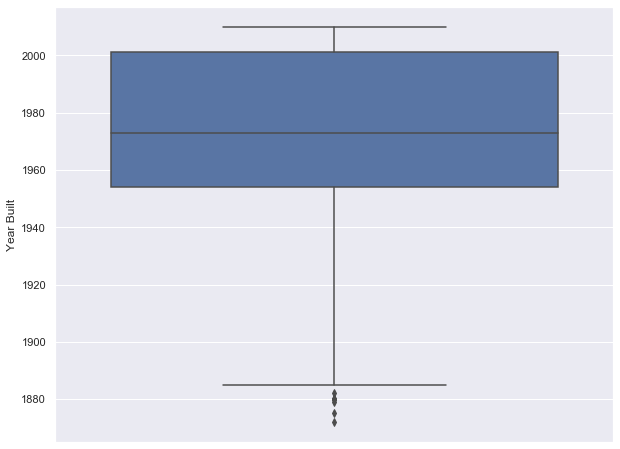

In [61]:
sns.boxplot(y = 'Year Built', data = data)

There some outliners but they can be consider original data as house can be built that time

[Text(0.5, 1.0, 'Before Outliner')]

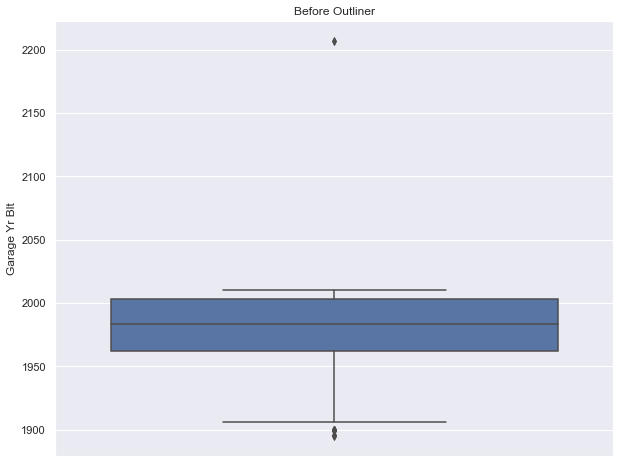

In [62]:
sns.boxplot(y = 'Garage Yr Blt', data = data).set(title = 'Before Outliner')

There are some outliner that need to remove

In [63]:
data['Garage Yr Blt'].value_counts()

2005.0    301
2006.0    115
2007.0    115
2004.0     99
2003.0     92
         ... 
1919.0      1
2207.0      1
1933.0      1
1908.0      1
1943.0      1
Name: Garage Yr Blt, Length: 103, dtype: int64

In [64]:
data.loc[data['Garage Yr Blt'] > 2020, 'Garage Yr Blt'] = 2005

[Text(0.5, 1.0, 'After removing Outliner')]

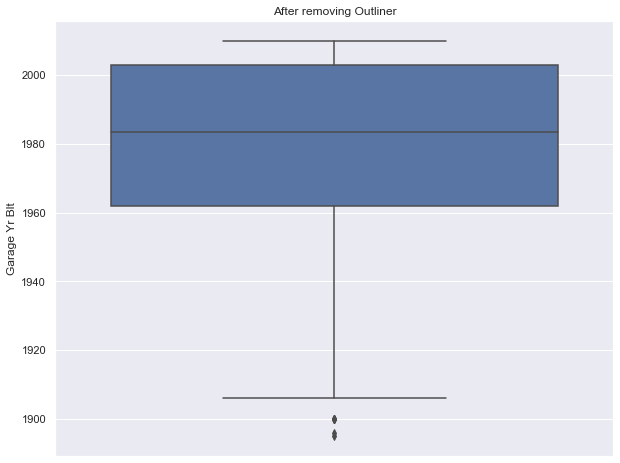

In [65]:
sns.boxplot(y = 'Garage Yr Blt', data = data).set(title = 'After removing Outliner')

#### Data visluation

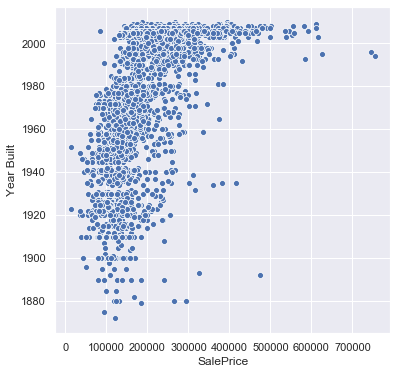

In [66]:
sns.set(rc={'figure.figsize':(6,6)})
sns.scatterplot(x = 'SalePrice', y = 'Year Built', data = data)

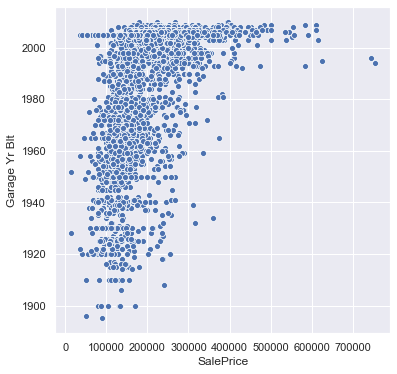

In [67]:
sns.scatterplot(x = 'SalePrice', y = 'Garage Yr Blt', data = data)

In [68]:
data['Full Bath'].value_counts()

2    1532
1    1318
3      64
0      12
4       4
Name: Full Bath, dtype: int64

In [70]:
data['Half Bath'].value_counts()

0    1843
1    1062
2      25
Name: Half Bath, dtype: int64

In [75]:
data['MS Zoning'].value_counts()

RL         2273
RM          462
FV          139
RH           27
C (all)      25
I (all)       2
A (agr)       2
Name: MS Zoning, dtype: int64

In [76]:
data['MS SubClass'].value_counts()

20     1079
60      575
50      287
120     192
30      139
160     129
70      128
80      118
90      109
190      61
85       48
75       23
45       18
180      17
40        6
150       1
Name: MS SubClass, dtype: int64

In [88]:
data['Overall Qual'].value_counts()

5     825
6     732
7     602
8     350
4     226
9     107
3      40
10     31
2      13
1       4
Name: Overall Qual, dtype: int64

In [73]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 77 columns):
Order              2930 non-null int64
PID                2930 non-null int64
MS SubClass        2930 non-null int64
MS Zoning          2930 non-null object
Lot Frontage       2930 non-null float64
Lot Area           2930 non-null int64
Street             2930 non-null object
Lot Shape          2930 non-null object
Land Contour       2930 non-null object
Utilities          2930 non-null object
Lot Config         2930 non-null object
Land Slope         2930 non-null object
Neighborhood       2930 non-null object
Condition 1        2930 non-null object
Condition 2        2930 non-null object
Bldg Type          2930 non-null object
House Style        2930 non-null object
Overall Qual       2930 non-null int64
Overall Cond       2930 non-null int64
Year Built         2930 non-null int64
Year Remod/Add     2930 non-null int64
Roof Style         2930 non-null object
Roof Matl          2

In [86]:
stats = data.describe().T
pd.options.display.float_format = '{:.2f}'.format
stats

,count,mean,std,min,25%,50%,75%,max
Order,2930.00,1465.50,845.96,1.00,733.25,1465.50,2197.75,2930.00
PID,2930.00,714464496.99,188730844.65,526301100.00,528477022.50,535453620.00,907181097.50,1007100110.00
MS SubClass,2930.00,57.39,42.64,20.00,20.00,50.00,70.00,190.00
Lot Frontage,2930.00,69.22,21.32,21.00,60.00,69.22,78.00,313.00
Lot Area,2930.00,10147.92,7880.02,1300.00,7440.25,9436.50,11555.25,215245.00
Overall Qual,2930.00,6.09,1.41,1.00,5.00,6.00,7.00,10.00
Overall Cond,2930.00,5.56,1.11,1.00,5.00,5.00,6.00,9.00
Year Built,2930.00,1971.36,30.25,1872.00,1954.00,1973.00,2001.00,2010.00
Year Remod/Add,2930.00,1984.27,20.86,1950.00,1965.00,1993.00,2004.00,2010.00
Mas Vnr Area,2930.00,101.89,178.41,0.00,0.00,0.00,162.75,1600.00


By this we take columns some to check correlation

In [89]:
small_data = data[['MS SubClass',
                   'Lot Frontage',
                   'Lot Area',
                   'Bsmt Unf SF',
                   'Total Bsmt SF',
                   '1st Flr SF',
                   'Gr Liv Area',
                   'Garage Area',
                   'SalePrice']]

[Text(0.5, 1, 'Feature Correction')]

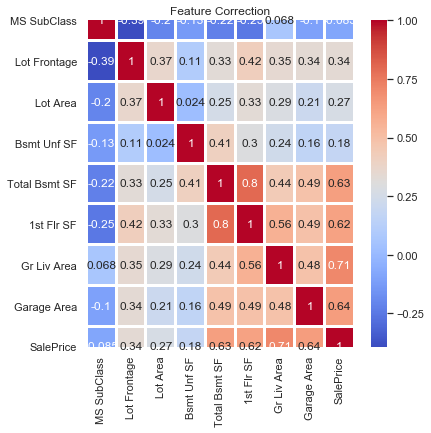

In [91]:
sns.heatmap(small_data.corr(), annot = True, linewidths = 2, linecolor = 'white', cmap = 'coolwarm').set(title = 'Feature Correction')

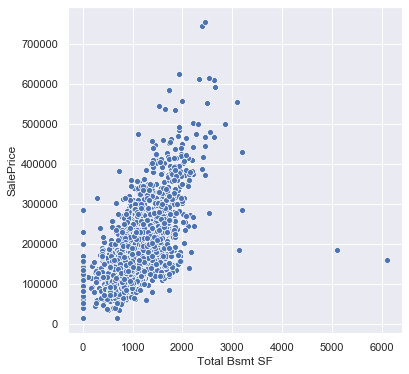

In [93]:
sns.scatterplot(x = 'Total Bsmt SF',y = 'SalePrice', data = data)